In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
df = pd.read_csv('../data/spiral.csv')

df.columns = ['X','Y','class']

In [18]:
df.head()

,X,Y,class
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


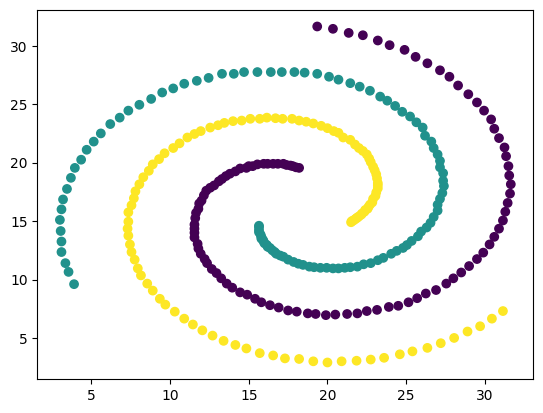

In [19]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [62]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [63]:
model = Sequential()
model.add(Dense(10,activation='relu', input_dim=2))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.get_weights()

[array([[-0.45998514, -0.5704677 , -0.15437347, -0.16175401, -0.05649698,
          0.56769305,  0.1787591 ,  0.555788  , -0.13151908,  0.38306195],
        [ 0.5493366 ,  0.236956  ,  0.24857956,  0.3076679 ,  0.33860356,
          0.32208246,  0.5262814 ,  0.22232729, -0.26056007,  0.35650152]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.15137571],
        [ 0.69027895],
        [-0.31577298],
        [-0.531376  ],
        [-0.45854437],
        [ 0.69542867],
        [ 0.6254061 ],
        [-0.46874207],
        [ 0.09702075],
        [-0.2192905 ]], dtype=float32),
 array([0.], dtype=float32)]

In [65]:
model.get_weights()[0].shape

(2, 10)

In [66]:
initial_weights = model.get_weights()

In [67]:
initial_weights[0] = np.ones(model.get_weights()[0].shape) * 0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape) * 0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape) * 0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape) * 0.5

In [68]:
model.set_weights(initial_weights)

In [69]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [70]:
df['class'].unique()

array([3, 1, 2])

In [71]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [72]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.4073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.4073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.4073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.4073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.4073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.4073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - acc

In [73]:
model.get_weights()

[array([[1.472325 , 1.472325 , 1.472325 , 1.472325 , 1.472325 , 1.472325 ,
         1.472325 , 1.472325 , 1.472325 , 1.472325 ],
        [1.4716747, 1.4716747, 1.4716747, 1.4716747, 1.4716747, 1.4716747,
         1.4716747, 1.4716747, 1.4716747, 1.4716747]], dtype=float32),
 array([1.4766647, 1.4766647, 1.4766647, 1.4766647, 1.4766647, 1.4766647,
        1.4766647, 1.4766647, 1.4766647, 1.4766647], dtype=float32),
 array([[1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076],
        [1.4745076]], dtype=float32),
 array([1.2904978], dtype=float32)]

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

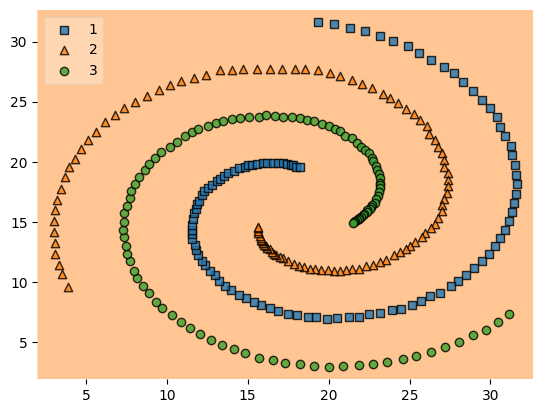

In [74]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [75]:
pos = 40
neg = 960
total = neg + pos

In [76]:
weight_for_0 = (1/neg)*(total/2.0)
weight_for_1 = (1/pos)*(total/2.0)

In [77]:
print(weight_for_0)
print(weight_for_1)

0.5208333333333334
12.5
